In [1]:
# random seed
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# load data
from tensorflow.keras import datasets
(X_train0, y_train0), (X_test0, y_test0) = datasets.mnist.load_data()

print(X_train0.shape)
print(y_train0.shape)
print(X_test0.shape)
print(y_test0.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


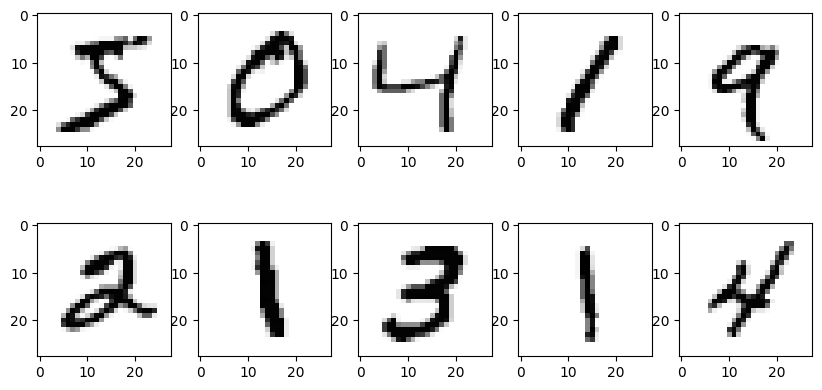

In [6]:
# original data visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train0[i].reshape((28, 28)),
               cmap='Greys')
plt.show()

In [12]:
# scaling
X_train_re = X_train0.reshape(60000, 28, 28, 1) # n_image, n_col, n_row, n_channel
X_train = X_train_re/255
print(X_train.shape)

X_test_re = X_test0.reshape(10000, 28, 28, 1)
X_test = X_test_re/255
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
# noise feature data
X_train_noise =X_train + np.random.uniform(-1, 1, size = X_train.shape)
X_test_noise = X_test + np.random.uniform(-1, 1, size = X_test.shape)

In [14]:
# noise data scaling
X_train_ns = np.clip(X_train_noise, a_min=0, a_max=1)
X_test_ns = np.clip(X_test_noise, a_min=0, a_max=1)

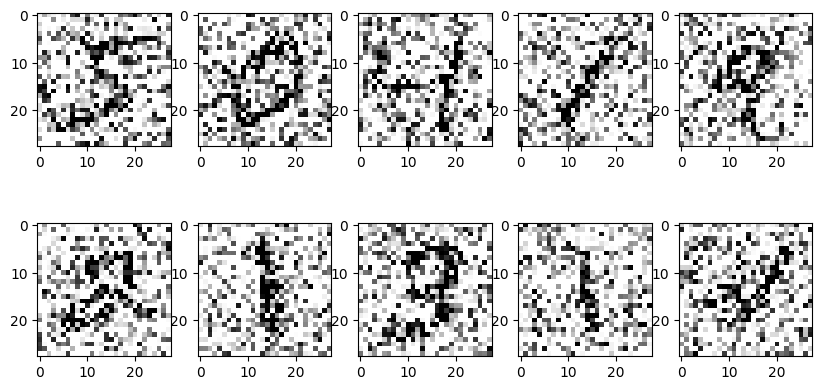

In [18]:
# noise data visualization
plt.figure(figsize=(10,5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_ns[i].reshape((28,28)),
               cmap='Greys')
plt.show()

In [22]:
# import
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Activation

In [23]:
# Encoder
input_layer1 = Input(shape=(28,28,1))
x1 = Conv2D(20, kernel_size=(5,5),
            padding='same')(input_layer1)
x1 = Activation(activation='relu')(x1)
output_layer1 = MaxPool2D(pool_size=2,
                          padding='same')(x1)
encoder = Model(input_layer1, output_layer1)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 20)        520       
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
Total params: 520
Trainable params: 520
Non-trainable params: 0
_________________________________________________________________


In [25]:
print(output_layer1.shape)
print(output_layer1.shape[0])
print(output_layer1.shape[1])
print(output_layer1.shape[2])


(None, 14, 14, 20)
None
14
14


In [28]:
# Decoder
input_layer2 = Input(shape = output_layer1.shape[1:4]) # (14, 14, 20)
x2 = Conv2D(10, kernel_size = (5,5),
            padding='same')(input_layer2)
x2 = Activation(activation='relu')(x2)
x2 = UpSampling2D()(x2)
x2 = Conv2D(1, kernel_size=(5,5),
            padding='same')(x2)
output_layer2 = Activation(activation='relu')(x2)
decoder = Model(input_layer2, output_layer2)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 14, 14, 20)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 10)        5010      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 10)        0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 28, 28, 10)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         251       
                                                                 
 activation_2 (Activation)   (None, 28, 28, 1)         0         
                                                           

In [29]:
# Auto-Encoder Model
input_auto = Input(shape=(28,28,1))
output_auto = decoder(encoder(input_auto))
auto_encoder = Model(input_auto, output_auto)
auto_encoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 14, 14, 20)        520       
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         5261      
                                                                 
Total params: 5,781
Trainable params: 5,781
Non-trainable params: 0
_________________________________________________________________


In [31]:
# model compile
auto_encoder.compile(loss='mean_squared_error',
                    optimizer='adam',
                    metrics=['mean_squared_error'])

In [33]:
# training
hist = auto_encoder.fit(X_train_ns, X_train,
                 epochs=1,
                 batch_size = 100)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
600/600 [==============================] - 50s 82ms/step - loss: 0.0271 - mean_squared_error: 0.0271


In [35]:
# predict value
X_pred = auto_encoder.predict(X_train_ns)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 13s 7ms/step


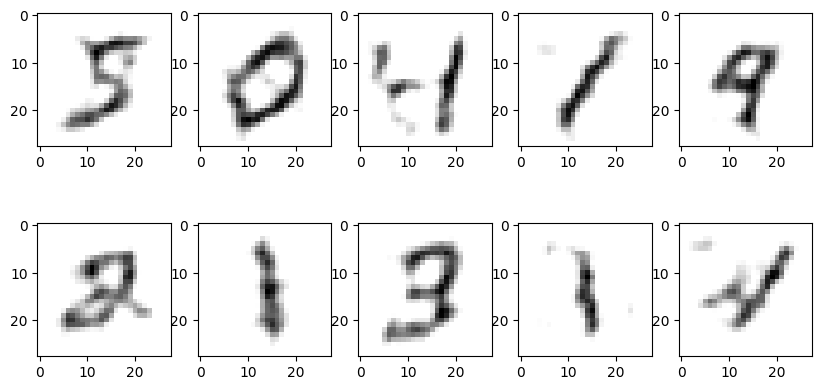

In [36]:
# auto-encoder visualization
plt.figure(figsize=(10,5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_pred[i].reshape((28,28)),
               cmap='Greys')
plt.show()